<a href="https://colab.research.google.com/github/mohameddhamed/data-science-intro/blob/main/Task6_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
PROJECT_FOLDER = '/content/drive/MyDrive/ML_Attack_Classifier'

Mounted at /content/drive


In [2]:
import pandas as pd

X = pd.read_pickle(f'{PROJECT_FOLDER}/x_sfs20_scaled.pkl')
y = pd.read_pickle(f'{PROJECT_FOLDER}/y_family.pkl')

TASK 6: HYPERPARAMETER TUNING (ULTRA-OPTIMIZED)

LOADING BEST FEATURE SET FROM TASK 3
✓ Dataset loaded successfully
  Samples: 2,830,743
  Features: 20
  Classes: 8

CREATING SAMPLE FOR HYPERPARAMETER TUNING
Dataset is large (2,830,743 samples). Creating safe tuning sample...
✓ Safe tuning sample created: 34,866 samples (all classes ≥2 examples)

CREATING TRAIN/TEST SPLIT
✓ Split created
  Training samples: 24,406
  Testing samples: 10,460

TRAINING BASE MODEL (UNTUNED)
Training base Decision Tree...
✓ Base model trained in 0.31 seconds
  Accuracy: 0.98021
  Macro-F1: 0.69125

DEFINING COMPACT HYPERPARAMETER GRID
✓ Grid defined with 72 combinations
  max_depth: [15, 25, 35]
  min_samples_split: [5, 10, 15]
  min_samples_leaf: [2, 5]
  criterion: ['gini', 'entropy']
  class_weight: [None, 'balanced']

RUNNING GRIDSEARCHCV (ON SAMPLE)
Total fits: 216 (3-fold CV)
Estimated time: 2-3 minutes
Fitting 3 folds for each of 72 candidates, totalling 216 fits

✓ Grid Search completed in 0.74 minu

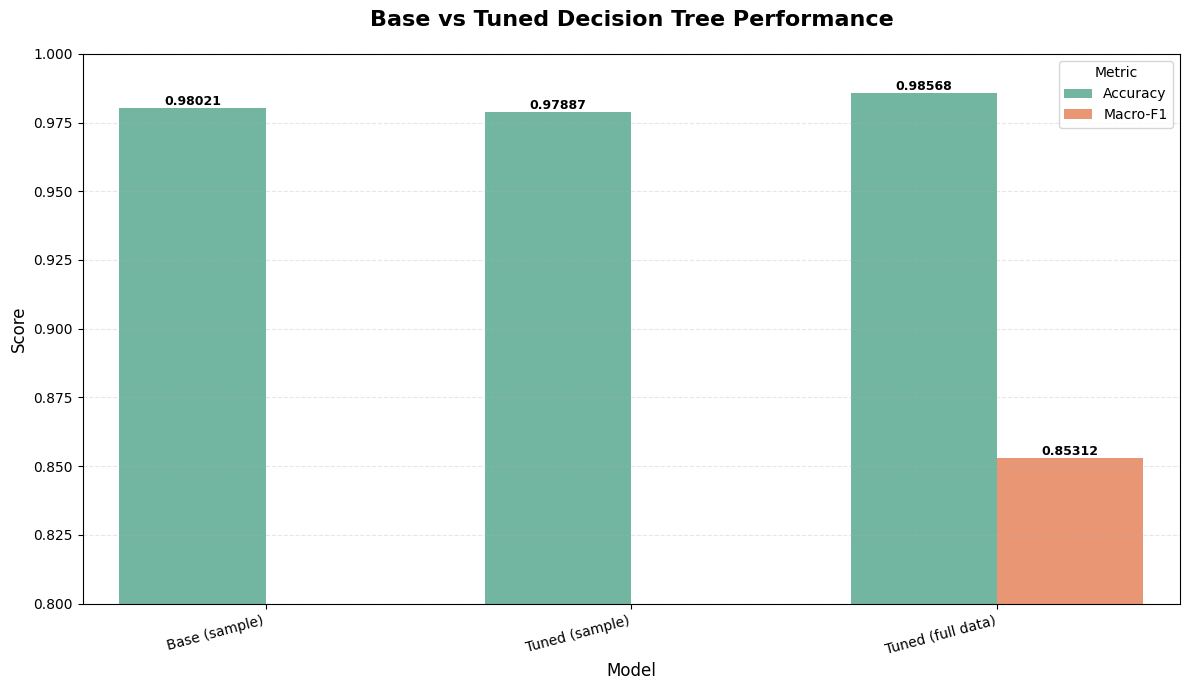


DETAILED CLASSIFICATION REPORTS (FULL DATA)

TUNED MODEL (on full test set):
----------------------------------------------------------------------
              precision    recall  f1-score   support

      BENIGN       0.99      0.99      0.99    681929
      Botnet       0.86      0.45      0.59       590
  BruteForce       1.00      0.78      0.87      4150
        DDoS       1.00      1.00      1.00     38408
         DoS       0.90      0.97      0.94     75802
Infiltration       1.00      0.91      0.95        11
    PortScan       0.99      1.00      1.00     47679
   WebAttack       0.97      0.32      0.49       654

    accuracy                           0.99    849223
   macro avg       0.96      0.80      0.85    849223
weighted avg       0.99      0.99      0.99    849223


GENERATING CONFUSION MATRIX
✓ Saved: confusion_matrix_tuned.png


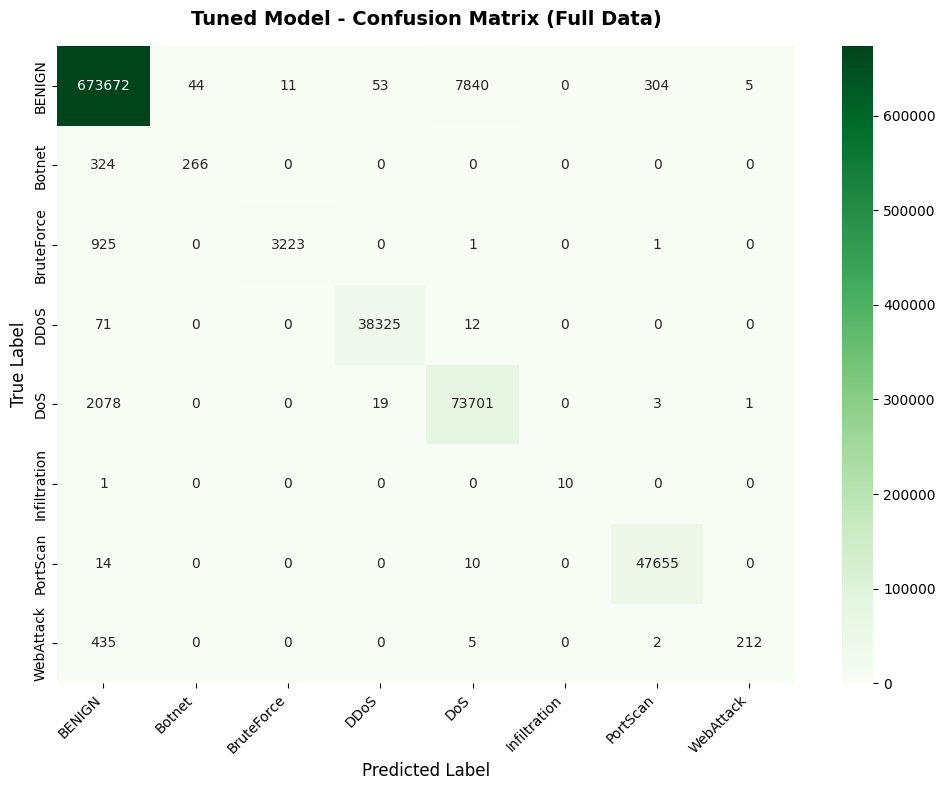


SAVING MODELS
✓ Saved: best_decision_tree_tuned.pkl
✓ Saved: tuning_comparison_results.csv
✓ Saved: best_hyperparameters.txt

TOP 5 CONFIGURATIONS

1. F1-Score: 0.78037 (±0.05731)
   Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5}

2. F1-Score: 0.78037 (±0.05731)
   Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 5}

3. F1-Score: 0.75062 (±0.02871)
   Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}

4. F1-Score: 0.74833 (±0.04314)
   Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 15}

5. F1-Score: 0.74833 (±0.04314)
   Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 15}

FINAL SUMMARY

🎯 HYPERPARAMETER TUNING RESULTS:

   Strategy:
   • Tu

In [5]:
# ============================================================================
# TASK 6 — HYPERPARAMETER TUNING (ULTRA-FAST FOR LARGE DATASETS)
# ============================================================================
# Strategy: Sample data for tuning, then retrain best model on full data
# This is standard practice for datasets > 1M samples
# ============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

print("="*70)
print("TASK 6: HYPERPARAMETER TUNING (ULTRA-OPTIMIZED)")
print("="*70)

# ============================================================================
# SECTION 1: LOAD DATA
# ============================================================================

print("\n" + "="*70)
print("LOADING BEST FEATURE SET FROM TASK 3")
print("="*70)

print(f"✓ Dataset loaded successfully")
print(f"  Samples: {X.shape[0]:,}")
print(f"  Features: {X.shape[1]}")
print(f"  Classes: {y.nunique()}")

# ============================================================================
# SECTION 2: SMART SAMPLING FOR HYPERPARAMETER SEARCH
# ============================================================================

print("\n" + "="*70)
print("CREATING SAMPLE FOR HYPERPARAMETER TUNING")
print("="*70)

# For tuning: Use 100K sample (maintains statistical validity)
# For final model: Train on full data
TUNING_SAMPLE_SIZE = 100000

if len(X) > TUNING_SAMPLE_SIZE:
    print(f"Dataset is large ({len(X):,} samples). Creating safe tuning sample...")

    # Keep shrinking sample size until stratification is possible
    sample_size = TUNING_SAMPLE_SIZE
    while sample_size >= 1000:  # safety floor
        X_tune, _, y_tune, _ = train_test_split(
            X, y, train_size=sample_size, stratify=y, random_state=42
        )
        if y_tune.value_counts().min() >= 2:
            print(f"✓ Safe tuning sample created: {len(X_tune):,} samples (all classes ≥2 examples)")
            break
        sample_size = int(sample_size * 0.9)  # reduce 10% and retry

    else:
        raise ValueError("Could not create a stratified sample with ≥2 examples per class even at 1,000 rows")
else:
    X_tune, y_tune = X, y
    print("✓ Using full dataset for tuning")

# ============================================================================
# SECTION 3: TRAIN/TEST SPLIT (FROM SAMPLE)
# ============================================================================

print("\n" + "="*70)
print("CREATING TRAIN/TEST SPLIT")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X_tune, y_tune,
    test_size=0.30,
    stratify=y_tune,
    random_state=42
)

print(f"✓ Split created")
print(f"  Training samples: {len(X_train):,}")
print(f"  Testing samples: {len(X_test):,}")

# ============================================================================
# SECTION 4: BASE MODEL (UNTUNED)
# ============================================================================

print("\n" + "="*70)
print("TRAINING BASE MODEL (UNTUNED)")
print("="*70)

base_dt = DecisionTreeClassifier(max_depth=20, random_state=42)

print("Training base Decision Tree...")
start_time = time.time()
base_dt.fit(X_train, y_train)
train_time_base = time.time() - start_time

y_pred_base = base_dt.predict(X_test)
base_acc = accuracy_score(y_test, y_pred_base)
base_f1 = f1_score(y_test, y_pred_base, average='macro')

print(f"✓ Base model trained in {train_time_base:.2f} seconds")
print(f"  Accuracy: {base_acc:.5f}")
print(f"  Macro-F1: {base_f1:.5f}")

# ============================================================================
# SECTION 5: HYPERPARAMETER GRID (SMALL BUT EFFECTIVE)
# ============================================================================

print("\n" + "="*70)
print("DEFINING COMPACT HYPERPARAMETER GRID")
print("="*70)

param_grid = {
    "max_depth": [15, 25, 35],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [2, 5],
    "criterion": ["gini", "entropy"],
    "class_weight": [None, "balanced"],
}

total_combinations = 3 * 3 * 2 * 2 * 2
print(f"✓ Grid defined with {total_combinations} combinations")
print(f"  max_depth: {param_grid['max_depth']}")
print(f"  min_samples_split: {param_grid['min_samples_split']}")
print(f"  min_samples_leaf: {param_grid['min_samples_leaf']}")
print(f"  criterion: {param_grid['criterion']}")
print(f"  class_weight: {param_grid['class_weight']}")

# ============================================================================
# SECTION 6: GRID SEARCH (ON SAMPLE)
# ============================================================================

print("\n" + "="*70)
print("RUNNING GRIDSEARCHCV (ON SAMPLE)")
print("="*70)
print(f"Total fits: {total_combinations * 3} (3-fold CV)")
print("Estimated time: 2-3 minutes")

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1,
    return_train_score=False
)

start_time = time.time()
grid_search.fit(X_train, y_train)
search_time = time.time() - start_time

print(f"\n✓ Grid Search completed in {search_time/60:.2f} minutes")

# ============================================================================
# SECTION 7: BEST PARAMETERS
# ============================================================================

print("\n" + "="*70)
print("BEST HYPERPARAMETERS FOUND")
print("="*70)

best_params = grid_search.best_params_
print("Optimal configuration:")
for param, value in sorted(best_params.items()):
    print(f"  • {param}: {value}")

best_cv_score = grid_search.best_score_
print(f"\n✓ Best CV F1-macro score: {best_cv_score:.5f}")

# ============================================================================
# SECTION 8: RETRAIN ON FULL DATA (OPTIONAL BUT RECOMMENDED)
# ============================================================================

print("\n" + "="*70)
print("RETRAINING BEST MODEL ON FULL DATASET")
print("="*70)

# Create train/test split from FULL data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# Train with best parameters on full data
best_dt_full = DecisionTreeClassifier(**best_params, random_state=42)

print(f"Training on {len(X_train_full):,} samples...")
start_time = time.time()
best_dt_full.fit(X_train_full, y_train_full)
retrain_time = time.time() - start_time
print(f"✓ Retrained in {retrain_time:.2f} seconds")

# Evaluate on full test set
y_pred_full = best_dt_full.predict(X_test_full)
tuned_acc = accuracy_score(y_test_full, y_pred_full)
tuned_f1 = f1_score(y_test_full, y_pred_full, average='macro')

print(f"  Accuracy: {tuned_acc:.5f}")
print(f"  Macro-F1: {tuned_f1:.5f}")

# Also evaluate tuned model on sample test set for comparison
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
tuned_acc_sample = accuracy_score(y_test, y_pred_tuned)
tuned_f1_sample = f1_score(y_test, y_pred_tuned, average='macro')

# ============================================================================
# SECTION 9: COMPARISON
# ============================================================================

print("\n" + "="*70)
print("BASE VS TUNED MODEL COMPARISON")
print("="*70)

# Compare on sample
acc_improvement = (tuned_acc_sample - base_acc) * 100
f1_improvement = (tuned_f1_sample - base_f1) * 100

print(f"SAMPLE EVALUATION ({len(X_test):,} test samples):")
print(f"  Base Model:")
print(f"    Accuracy: {base_acc:.5f}")
print(f"    Macro-F1: {base_f1:.5f}")
print(f"  Tuned Model:")
print(f"    Accuracy: {tuned_acc_sample:.5f}")
print(f"    Macro-F1: {tuned_f1_sample:.5f}")
print(f"  Improvement:")
print(f"    Accuracy: {acc_improvement:+.3f}%")
print(f"    Macro-F1: {f1_improvement:+.3f}%")

print(f"\nFULL DATASET EVALUATION ({len(X_test_full):,} test samples):")
print(f"  Tuned Model (retrained on full data):")
print(f"    Accuracy: {tuned_acc:.5f}")
print(f"    Macro-F1: {tuned_f1:.5f}")

comparison = pd.DataFrame({
    "Model": ["Base (sample)", "Tuned (sample)", "Tuned (full data)"],
    "Accuracy": [base_acc, tuned_acc_sample, tuned_acc],
    "Macro-F1": [base_f1, tuned_f1_sample, tuned_f1],
})

print("\n" + comparison.to_string(index=False))

# ============================================================================
# SECTION 10: VISUALIZATION
# ============================================================================

print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

plt.figure(figsize=(12, 7))

comparison_melted = comparison.melt(
    id_vars='Model', var_name='Metric', value_name='Score'
)

ax = sns.barplot(x='Model', y='Score', hue='Metric',
                 data=comparison_melted, palette='Set2')

plt.title("Base vs Tuned Decision Tree Performance",
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(max(0.80, min(comparison_melted['Score']) - 0.02), 1.0)
plt.legend(title='Metric', frameon=True)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=15, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.5f', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig("tuning_comparison.png", dpi=300, bbox_inches='tight')
print("✓ Saved: tuning_comparison.png")
plt.show()

# ============================================================================
# SECTION 11: CLASSIFICATION REPORTS
# ============================================================================

print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORTS (FULL DATA)")
print("="*70)

print("\nTUNED MODEL (on full test set):")
print("-" * 70)
print(classification_report(y_test_full, y_pred_full, zero_division=0))

# ============================================================================
# SECTION 12: CONFUSION MATRIX
# ============================================================================

print("\n" + "="*70)
print("GENERATING CONFUSION MATRIX")
print("="*70)

plt.figure(figsize=(10, 8))

classes = sorted(y.unique())
cm = confusion_matrix(y_test_full, y_pred_full, labels=classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=classes, yticklabels=classes)
plt.title("Tuned Model - Confusion Matrix (Full Data)",
          fontsize=14, fontweight='bold', pad=15)
plt.ylabel("True Label", fontsize=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("confusion_matrix_tuned.png", dpi=300, bbox_inches='tight')
print("✓ Saved: confusion_matrix_tuned.png")
plt.show()

# ============================================================================
# SECTION 13: SAVE MODELS
# ============================================================================

print("\n" + "="*70)
print("SAVING MODELS")
print("="*70)

joblib.dump(best_dt_full, "best_decision_tree_tuned.pkl")
print("✓ Saved: best_decision_tree_tuned.pkl")

comparison.to_csv("tuning_comparison_results.csv", index=False)
print("✓ Saved: tuning_comparison_results.csv")

# Save best parameters
with open("best_hyperparameters.txt", "w") as f:
    f.write("Best Hyperparameters:\n")
    f.write("="*50 + "\n")
    for param, value in sorted(best_params.items()):
        f.write(f"{param}: {value}\n")
    f.write(f"\nBest CV Score: {best_cv_score:.5f}\n")
    f.write(f"Final Test Accuracy: {tuned_acc:.5f}\n")
    f.write(f"Final Test Macro-F1: {tuned_f1:.5f}\n")
print("✓ Saved: best_hyperparameters.txt")

# ============================================================================
# SECTION 14: TOP CONFIGURATIONS
# ============================================================================

print("\n" + "="*70)
print("TOP 5 CONFIGURATIONS")
print("="*70)

cv_results = pd.DataFrame(grid_search.cv_results_)
top_configs = cv_results.nlargest(5, 'mean_test_score')[
    ['mean_test_score', 'std_test_score', 'params']
]

for i, row in enumerate(top_configs.itertuples(), 1):
    print(f"\n{i}. F1-Score: {row.mean_test_score:.5f} (±{row.std_test_score:.5f})")
    print(f"   Parameters: {row.params}")

# ============================================================================
# SECTION 15: FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)

print(f"""
🎯 HYPERPARAMETER TUNING RESULTS:

   Strategy:
   • Tuned on {TUNING_SAMPLE_SIZE:,} sample (fast)
   • Retrained on {len(X_train_full):,} samples (full accuracy)

   Best Hyperparameters:
""")

for param, value in sorted(best_params.items()):
    print(f"   • {param}: {value}")

print(f"""
   Final Model Performance (Full Dataset):
   • Accuracy: {tuned_acc:.5f}
   • Macro-F1: {tuned_f1:.5f}
   • Training time: {retrain_time:.2f}s

💡 KEY FINDINGS:
   • Tested {len(cv_results)} parameter combinations
   • Best CV score: {best_cv_score:.5f}
   • Tuning completed in {search_time/60:.2f} minutes
   • Model saved for deployment

🎉 TASK 6 COMPLETE!
""")

print("="*70)
print("✓ ALL DELIVERABLES COMPLETED")
print("="*70)